2048 2048


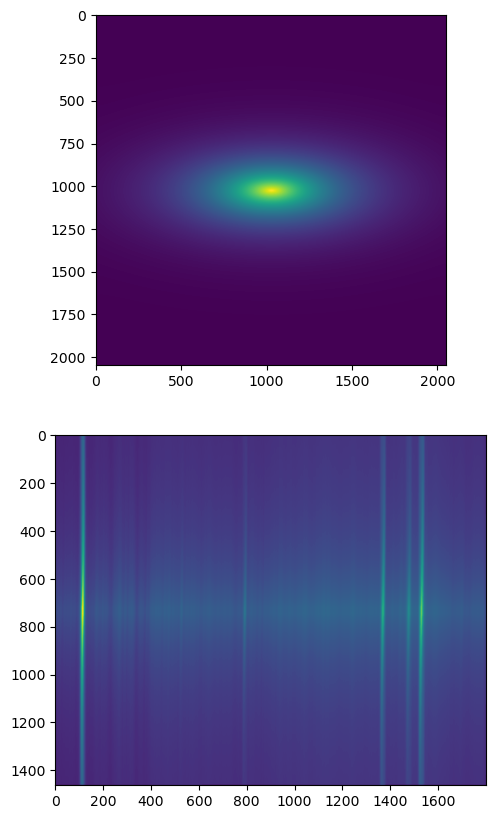

In [1]:
import astropy.io.fits as pyfits
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u


file_flux = 'obsprakt.fits'
#pyfits.info(file_flux)
hdu = pyfits.open(file_flux)
IMG = hdu[1].data
LSS = hdu[2].data
headerIMG= hdu[1].header
headerLSS = hdu[2].header


def imgEnd(header):
    return header["CRVAL1"]+(header["NAXIS1"]-2)*header["CDELT1"]
    
xIMG = np.arange(headerIMG["CRVAL1"], imgEnd(headerIMG) + headerIMG["CDELT1"], headerIMG["CDELT1"])

yIMG = lambda x: IMG[x]

print(len(IMG), len(xIMG))
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].imshow(IMG)
axes[1].imshow(LSS)

plt.show()


In [2]:
headerIMG
headerLSS


XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1800                                                  
NAXIS2  =                 1463                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    2 / Number of coordinate axes                      
CRPIX1  =                  1.0 / Pixel coordinate of reference point            
CRPIX2  =                  1.0 / Pixel coordinate of reference point            
CDELT1  =  7.2249310601477E-10 / [m] Coordinate increment at reference point    
CDELT2  =            0.0013675 / [arcsec] Coordinate increment at reference poin
CUNIT1  = 'm'               

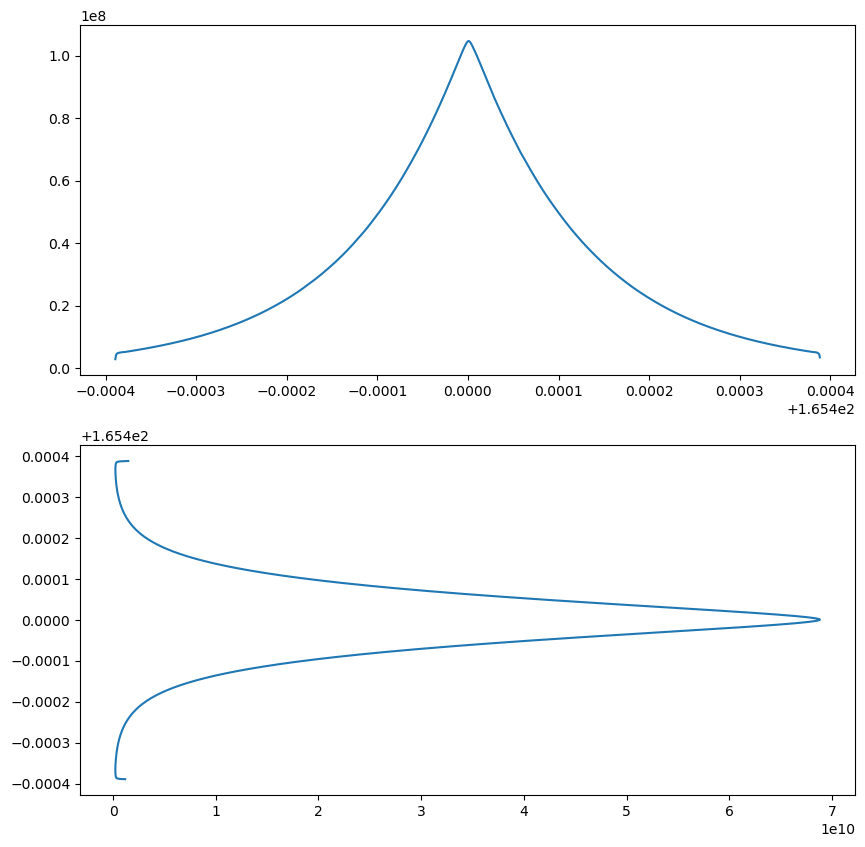

In [3]:
xStartIMG = headerIMG['CRVAL1'] - headerIMG['CRPIX1']*headerIMG['CDELT1']
xEndIMG = headerIMG['CRVAL1'] + (2047 - headerIMG['CRPIX1'])*headerIMG['CDELT1']
xDegIMG = np.arange(xStartIMG, xEndIMG, headerIMG['CDELT1'])

yStartIMG = headerIMG['CRVAL2'] - headerIMG['CRPIX2']*headerIMG['CDELT2']
yEndIMG = headerIMG['CRVAL2'] + (2047 - headerIMG['CRPIX2'])*headerIMG['CDELT2']
yDegIMG = np.arange(xStartIMG, xEndIMG, headerIMG['CDELT2'])

fix, axis = plt.subplots(2, 1, figsize=(10, 10))
flux = np.nansum(IMG, 1)
axis[0].plot(xDegIMG, IMG[1024, :])
axis[1].plot(flux, yDegIMG)

plt.show()

-0.0011111111111111111 -0.0005553743055555555 1800 1


ValueError: x and y must have same first dimension, but have shapes (1463,) and (1,)

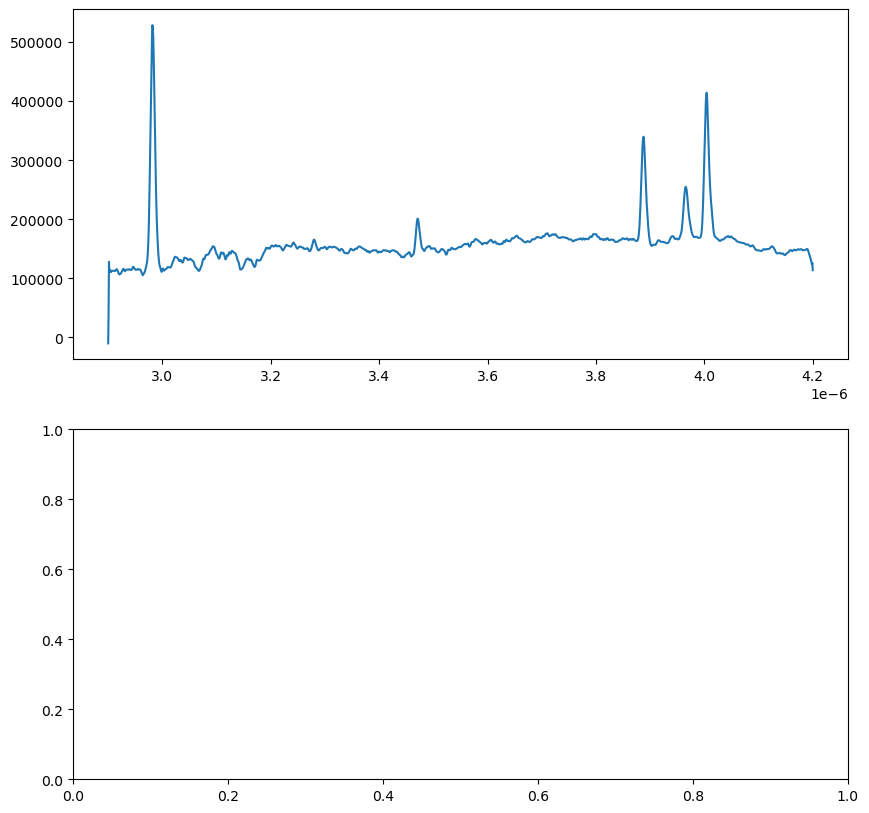

In [6]:
xStartLSS = headerLSS['CRVAL1']
xEndLSS = xStartLSS + (1799)*headerLSS['CDELT1']
xDegLSS = np.arange(xStartLSS, xEndLSS, headerLSS['CDELT1'])

yStartLSS = headerLSS['CRVAL2'] * u.arcsec.to('deg')
yEndLSS = yStartLSS + (1463)*headerLSS['CDELT2'] * u.arcsec.to('deg')
yDegLSS = np.arange(yStartLSS, yEndLSS, headerLSS['CDELT2'])

print(yStartLSS, yEndLSS, len(xDegLSS), len(yDegLSS))

fix, axis = plt.subplots(2, 1, figsize=(10, 10))
axis[0].plot(xDegLSS, LSS[900, :])

flux = np.nansum(LSS, 1)
axis[1].plot(flux, yDegLSS)

plt.show()
